# 1. 분류란?
## (1) 지도학습 : 회귀 vs 분류
- 회귀 : 주어진 데이터(X)를 기반으로 정답(Y)을 잘 맞추는(fit)하는 함수(function)을 찾는 문제 -> 데이터가 연속형 변수를 예측하기 위해 사용될 때
- 분류 : 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것 -> 데이터가 범주형 변수를 예측하기 위해 사용될 때

- 분류에 쓰이는 대표적인 머신러닝 알고리즘
1. 로지스틱 회귀 : 독립변수와 종속변수의 선형 관계성에 기반해 분류
2. 결정 트리 : 데이터 균일도에 따른 규칙 기반의 분류
3. 서포트 벡터 머신 : 개별 클래스 간의 최대 마진을 효과적으로 찾아 분류
4. 최소 근접 알고리즘 : 근접 거리 기준으로 분류


## (2) 이진 분류와 다중 분류
- 이진 분류 : 예측하고자 하는 변수가 어떤 기준에 대하여 참(True) 또는 거짓(False)의 값만을 가질 때
- 다중 분류 : 예측하고자 하는 변수가 가질 수 있는 값이 3개 이상일 때


# 2. 분류 모델
## (1) 로지스틱 회귀(Logistic Regression)
- 로지스틱 회귀는 이진 분류 문제를 푸는 대표적인 알고리즘으로, 샘플이 특정 클래스에 속할 확률을 추정하여 기준치에 따라 분류하는 것을 목표로 함
- 독립 변수의 선형 조합(선형 회귀)에 로지스틱 함수를 적용하여 출력값을 0에서 1사이로 변환해주는 것을 의미함

- $y=wx+b$의 직선이 분류 문제에 적합하지 않은 이유!
    - x와 y의 관계를 표현하기 위해서는 직선을 표현하는 함수가 아니라 S자 형태로 표현하는 함수가 필요함. 그래서 시그모이드 함수를 사용함.
    - 예측값이 0과 1사이의 값을 가져야 함.
- -> 출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수를 이용해야 한다!

### [시그모이드 함수]
- 로지스틱 함수와 비슷함, 출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수
- 입력값이 커지면 1에 수렴, 입력값이 작아지면 0에 수렴함
- 입력값($x$)이 $(-\infin, \infin)$일 때, 출력값($y$)은 0~1의 값을 가짐
- -> 출력값이 특정값 이상이면 1(True), 특정값 이하면 0(False)로 정해서 이진 분류 문제를 풀 때 사용하자!
### [시그모이드 함수의 가중치]
- 시그모이드 함수가 $H(x)=\frac{1}{1+e^{-(wx+b)}}=sigmoid(wx+b)=\sigma(wx+b)$일 때 -> 인공지능은 주어진 데이터에 적합한 가중치 w와 b를 계산해서 찾음!
    1. 가중치 w의 변화에 따른 그래프 변화
    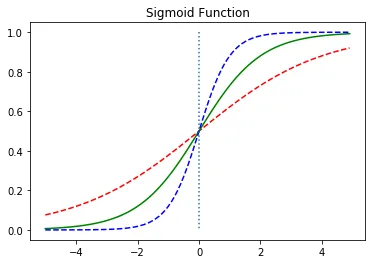  
    (빨강)$w=0.5$,  (초록)$w=1.0$,  (파랑)$w=2.0$

    2. 가중치 b의 변화에 따른 그래프 변화
    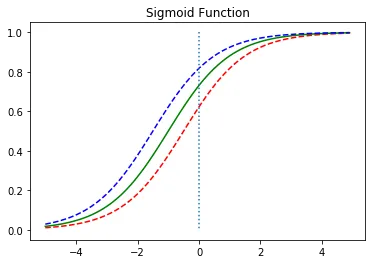  
    (빨강)$b=0.5$,  (초록)$b=1.0$,  (파랑)$b=1.5$

## (2) 의사결정나무 (Decision Tree)
- 조건에 따라 데이터를 분류하며, 최종적으로 데이터가 순수한 label의 집합으로 구성될 때까지 분류를 반복하는 분석 방법
- 스무고개 놀이와 비슷한 방식임

### [의사결정나무의 구성 요소]
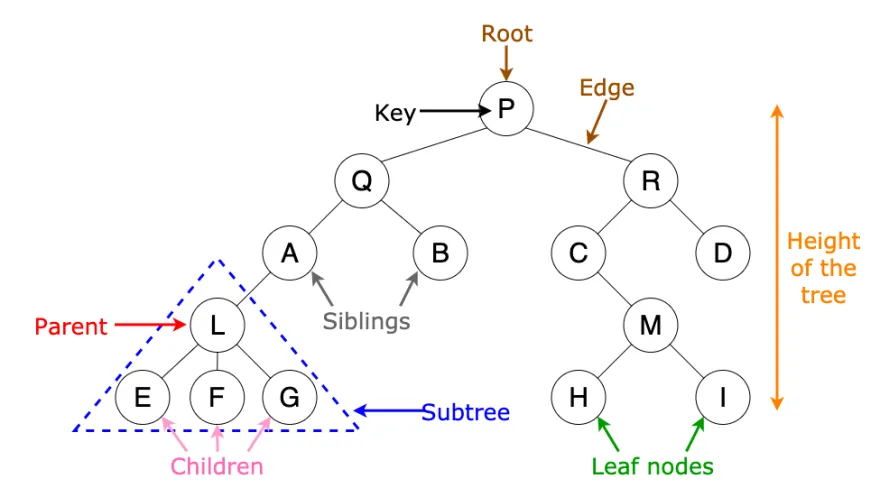
- Root Node: 가장 상위에 위치한 노드
- Parent Node: 주어진 노드의 상위에 있는 노드
- Child Node: 하나의 노드로부터 분리된 2개 이상의 노드들
- Binary Tree(이진 트리): Tree 중에서 children이 최대 2개인 tree
- Leaf Nodes: 자식마디가 없는 노드, 모델에서 label에 해당
- Edge: Parent node와 child node를 연결하는 연결선
- Height: 특정 노드에서 가장 멀리 있는 leaf node까지의 경로에 있는 edge 개수
- Depth: Root node에서 특정 노드에 도달하기 위한 edge의 수

### [CART(이진분할; Classification And Regression Tree) 알고리즘]
- CART: 가장 널리 사용되는 의사결정나무 알고리즘으로, 데이터셋을 임계값을 기준으로 두 child로 나누는 알고리즘
- 임계값은 불순도(지니 계수)가 낮아지는 방향으로 나눔!
    - 불순도: 분류하려는 데이터 집합에서 서로 다른 클래스(범주)가 섞여 있는 정도, 불순도를 확인하기 위해 지니 지수를 사용함
    - 지니 지수: 불순도를 나타내며, 통계적 분산 정도를 정량화해서 표현한 값
        - 0~1사이 값, 0이면 가장 순수도가 높음, 0.5면 반반 섞여있음
- CART 알고리즘은 이 Gini 계수의 값이 작아지는 방향으로 학습함

**- CART 알고리즘의 주요 단계**
1. 임계값 설정  
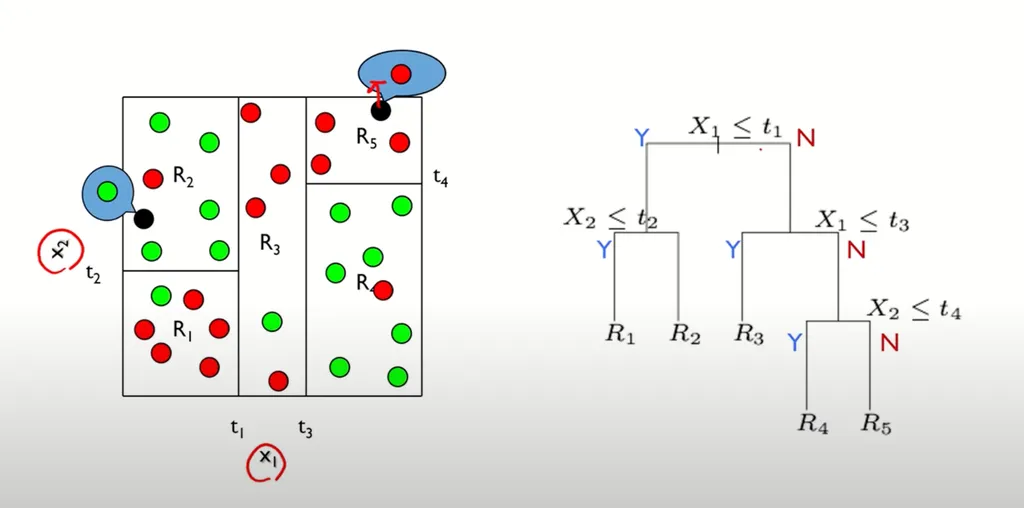  
왼쪽과 오른쪽 그림은 기본적으로 같은 모델임. t1 .. t4의 임계값을 기준으로 하여 데이터를 그룹으로 나눔. (R1 … R5)

2. 불순도 감소 알고리즘  
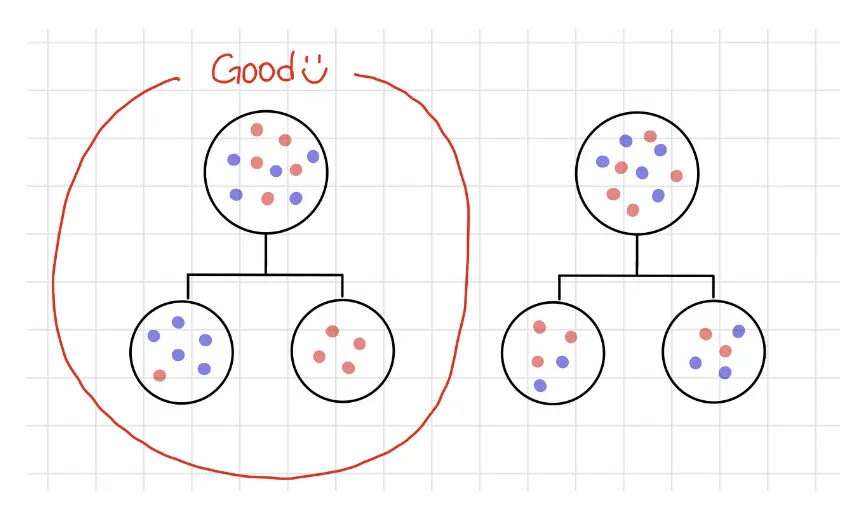  
의사결정나무를 만들어나갈 때 클래스를 정확하게 구분해줄 수 있는 분류기준을 찾는 것이 중요함. 이때 불순도 알고리즘을 사용하여 현재 집단에 어느 정도 다른 객체들이 섞여있는지 확인하고 불순도가 낮은 쪽으로 가지를 형성해 나감.

### [실제 학습 시 고려해야 할 것들: 모수 설정, 차이점 시각화, Prunning]
**1. Hyperparameter 설정**
    
| `min_samples_split` | 분할되기 위해 노드가 가져야 하는 최소 샘플(데이터) 수 |
| --- | --- |
| `min_samples_leaf` | 리프 노드가 가지고 있어야 하는 최소 샘플 수 |
| `min_weight_fraction_leaf` | `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율 |
| `max_leaf_nodes` | 리프 노드의 최대 개수 |
| `max_features` | 각 노드에서 분할에 사용할 특성의 최대 수 |

**2. 시각화**
- 시각화를 수행하여 분류가 잘 이루어졌는지 확인할 수 있음

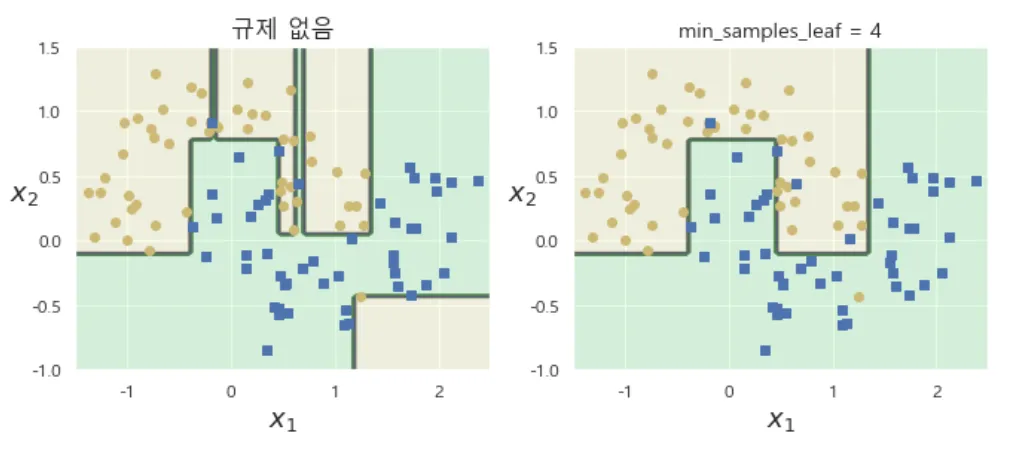  
왼쪽 그림은 규제가 없어서 과적합이 이루어진 모습, 오른쪽 그림은 min_samples_leaf 개수를 제어하여 적절히 분류됨.

**3. Prunning(가지치기)**
- 불필요한 노드 지우기

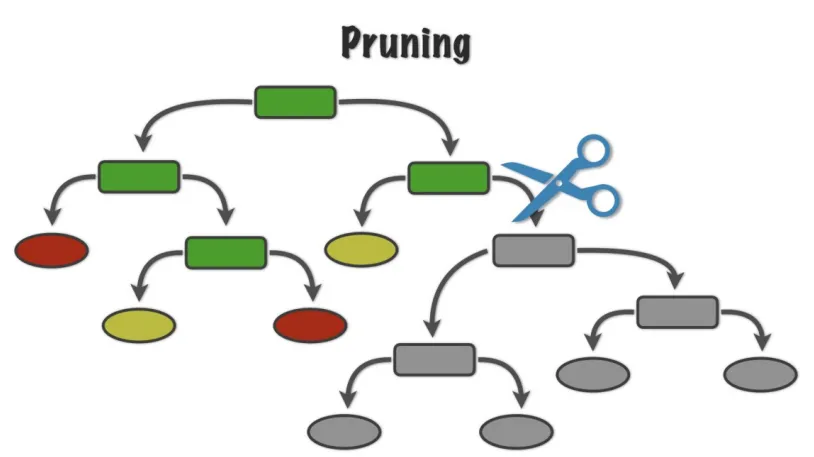  
- 노드가 너무 많아지면 2번(시각화)의 왼쪽 그림처럼 과적합이 될 확률이 높음. 이럴 때 Prunning을 통해 하부 트리를 제거하여 일반화 성능을 높일 수 있음.
- Prunning을 하면 깊이가 줄어들고 결과의 개수가 줄어듦.


## (3) SVM(Support Vector Machine)
- SVM: 클래스를 분류할 수 있는 다양한 경계선 중 최적의 라인을 찾아내는 알고리즘
- 데이터를 분리하는 초평면 중에서 데이터들과 가장 거리가 먼 초평면을 선택하여 분리하는 지도 학습 기반의 이진 선형 분류 모델  
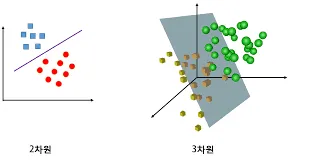
- 명확하게 분류할 수 있는 데이터 집단에서 뛰어난 성능을 보임. 고차원 공간(다수의 feature)에서도 효과적으로 사용 가능
- 패턴 인식, 이미지 분석, 바이오인포매틱스 등 다양한 머신러닝 응용 분야에서 활용됨

### [SVM의 구성]
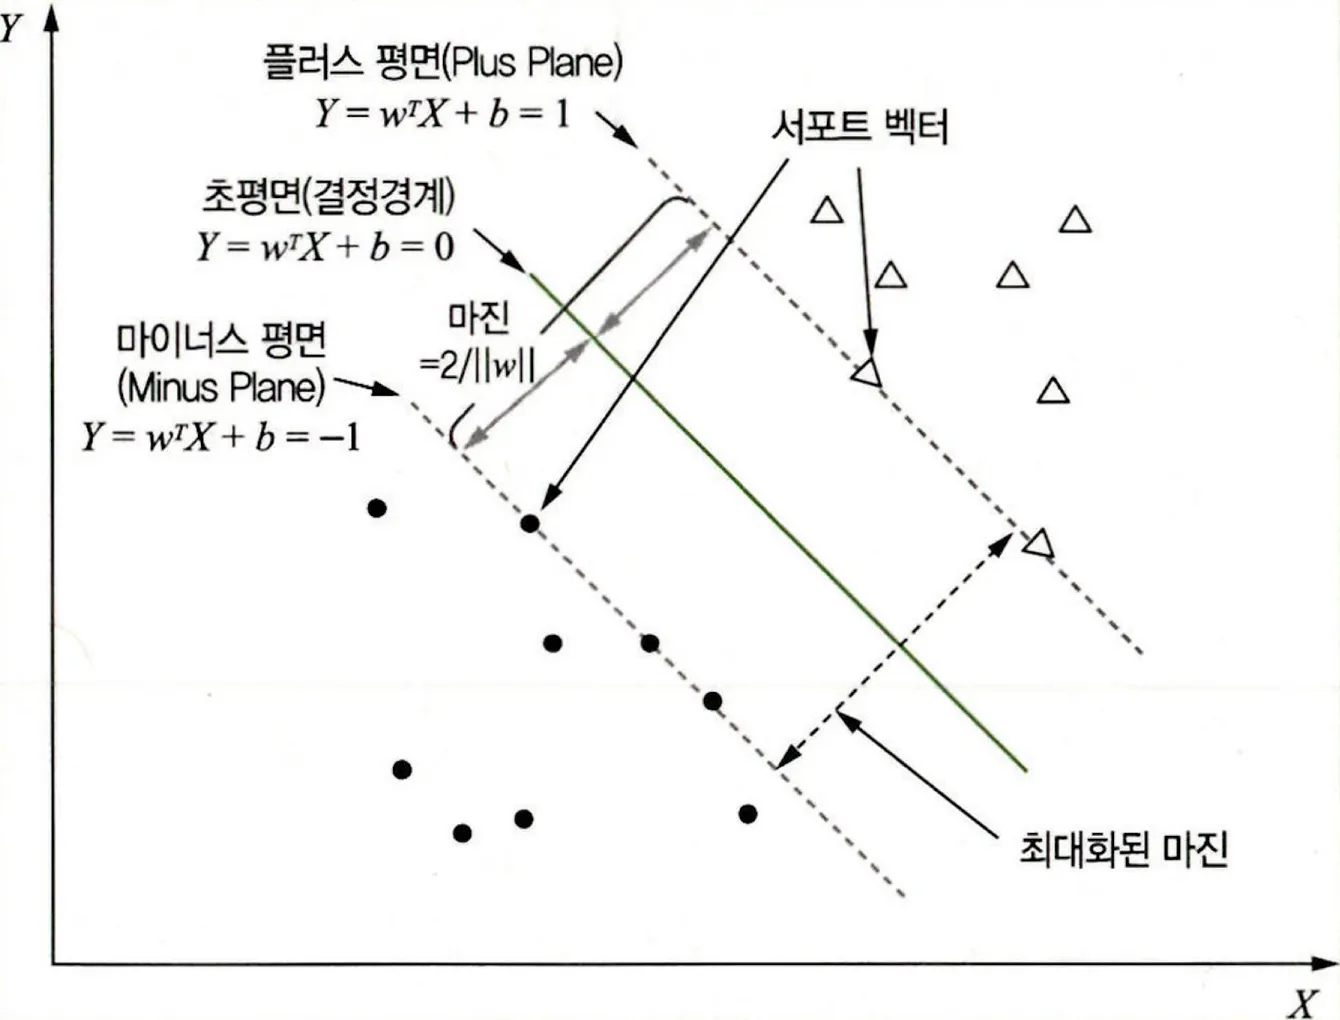
- Support vector(서포트 벡터): 데이터 중에서 결정 경계와 가장 가까이에 있는 데이터들의 집합
- Decision Boundary(결정 경계): 데이터 분류의 기준이 되는 경계
- Margin(마진): 결정 경계에서 서포트 벡터까지의 거리(여유 공간)
- Hyperplane(초평면): n차원 공간의 (n-1)차원 평면
- Slack Variables(슬랙 변수/여유변수): 완벽한 분리가 불가능할 때 분류를 위해 허용된 오차에 대한 변수

### [최적의 선을 찾는 방법]
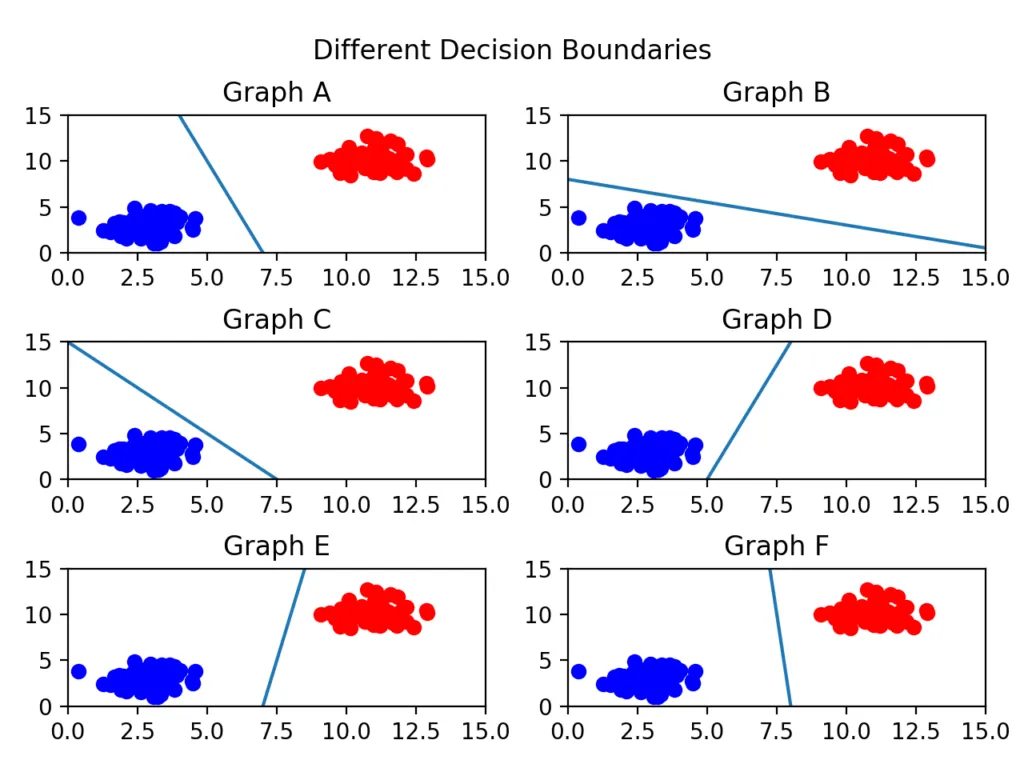
- 가장 좋은 결정경계는 F임
- 결정 경계는 데이터로부터 가장 멀리 떨어져 있는게 좋음. 따라서 SVM은 Margin(거리)가 가장 큰 경우를 선택함으로써 최적의 선을 찾음

### [SVM의 장단점]

| **장점** | **단점** |
| --- | --- |
| 서포트 벡터만을 이용해서 결정 경계를 생성하므로 데이터가 적을 때 효과적 | 데이터 전처리 과정이 중요 |
| 새로운 데이터가 입력되면 전체 데이터 포인트와의 거리를 계산하지 않고 서포트 벡터와의 거리만 계산하면 되기 때문에 연산량 최소화 | 데이터가 많아질수록 최적화를 위한 평가 과정이 많아져서 속도가 느림 |
| 정확성이 뛰어나며, 비선형 모델 분류 가능 |  |
| 다른 모형보다 과대 적합의 가능성이 낮고, 노이즈의 영향이 적음 |  |



## (4) KNN(K-Nearest Neighbor)
- KNN의 가정: 유유상종!, 즉 비슷한 특성을 가진 데이터끼리 서로 가까이 있다는 점을 이용한 분류 알고리즘임
- KNN: 데이터로부터 거리가 가까운 k개의 다른 데이터 레이블을 참조하여 분류하는 알고리즘

### [KNN 알고리즘 계산 순서]

1. 데이터 준비
- KNN은 미리 학습하는 과정이 없기 떄문에, 데이터를 준비해야 함
- 각 데이터는 특징 벡터와 레이블(어떤 class인지)로 이루어짐
2. K 값 설정
- 원하는 K 값을 설정함. K는 가장 가까운 이웃의 개수를 나타내며, 보통 홀수개로 설정함
3. 거리 계산
- 새로운 데이터(예측하려는 데이터)가 주어지면, 이 값과 기존 모든 데이터 간의 거리를 계산함
- 유클리드 거리, 맨해튼 거리 등을 사용
4. 가장 가까운 K개의 이웃 선택
- 계산된 거리 중에서 가장 작은 거리 값을 가진 K개의 데이터를 선택함
- 이 데이터 포인트들이 '가장 가까운 이웃'임
5. 분류하기
- K개의 이웃 중 가장 많이 등장하는 클래스가 예측 결과가 됨

### [최적의 K 선택하는 법]
- 일반적으로는 학습용 데이터 개수의 제곱근으로 설정
- K를 너무 크게 설정하면 주변에 있는 점과의 근접성이 떨어져서 분류가 잘 이뤄지지 않고 과소 적합
- K를 너무 작게 설정하면 이상값, 잡음 데이터와 이웃이 될 가능성이 있음

### [K-NN 알고리즘 예시]
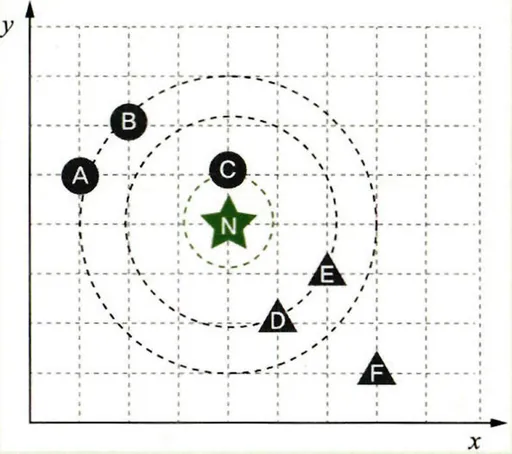
1. 그림과 같이 6개의 기존 데이터 A~F와 1개의 신규 데이터 N이 있고, 주변에 있는 이웃의 개수를 K라고 함
2. K=1이라면, 거리가 첫 번째로 가까운 C를 보고 신규 데이터인 N을 동그라미 그룹으로 분류함
3. 하지만 K=3이라면 신규 데이터인 N과 거리가 세 번째로 가까운 C,D,E를 보고 N과 가장 가까운 이웃들이 속해있는 클래스로 N을 분류한다. 이때 C와 D,E는 각각 그룹이 다른데, 이때 다수결의 원칙에 따라 N은 세모로 분류됨.
4. K-5이라면 3:2로 N은 동그라미로 분류됨.
* 3개 이상의 범주로 분류하는 문제에서는 분류될 범주와 데이터의 세부 값 등을 고려하여 적절한 K의 값을 설정해야 함.
* 투표에서 동점이 나오면 -> 더 가까운 이웃에 해당하는 클래스로 분류 or 클래스 중 무작위로 하나 선택

💡 KNN의 중요한 특징은, **어떠한 학습이 필요하지 않다는 것**이다! 별도의 모델없이 데이터만을 이용해서,  새로운 데이터가 왔을 때 그때 즉석에서 주변 데이터들을 이용하여 classify를 하는 것임!

### [KNN의 장단점]
| 장점 | 단점 |
| --- | --- |
| 범주를 나눈 기준을 알지 못해도 데이터를 분류할 수 있음 | 다른 분류 모형과 달리 테스트 데이터의 개수에 따라 시간이 오래 걸림 |
| 입력 데이터만 주어지면 바로 예측값을 구할 수 있어서 다른 분류 모형과는 달리 학습 과정이 필요 없음 | 학습 데이터 모두를 거리 계산에 사용하기 때문에 학습 데이터의 양도 계산 시간에 영향을 미침 |
| 이해가 쉽고, 구현이 간단 | K의 값 결정이 어려움 |
| 추가된 데이터의 처리가 용이 | 수치형 데이터가 아니면 유사도를 정의하기 어려움 |
| 훈련 데이터를 요약하거나 일반화된 모델로 만들지 않고, 원본 데이터 전체를 그대로 저장 | 데이터 내 이상치가 존재하면 분류 성능에 큰 영향을 받음 |



# 3. 분류 평가 지표
## (1) 혼동 행렬
- 혼동 행렬: 분류 모델의 예측 결과를 정확한 예측과 잘못된 예측으로 구분하여 나타낸 표(행렬)  
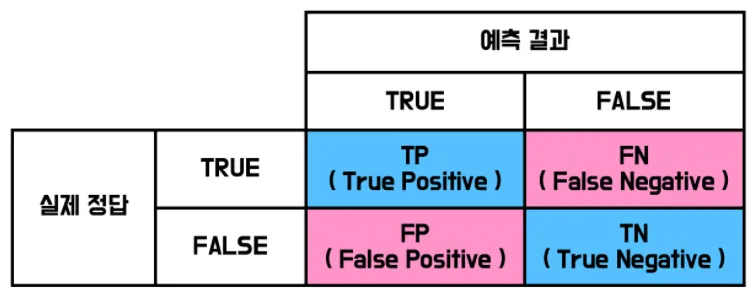
- 파란색 상자: 예측을 올바르게 한 경우{O->O(TP), X->X(TN)}
- 빨간색 상자: 예측을 잘못한 경우{O->X(FP), X->O(FN)}

### [혼동행렬을 이용한 분류 모델 평가 지표]
- 정확도(Accuracy): 모든 가능한 예측 중 참인 비율
    - (TP+TN) / (TP+TN+FP+FN) = 참인 예측 / 모든 예측
    - 단점: 정답 레이블의 비율이 불균형하면 모델의 정확도를 신뢰할 수 없음
- 정밀도(precision): 참이라고 예측한 경우 실제 참의 비율
    - TP / (TP+FP) = 예측 '참'이라고 한 경우 중 실제 '참'의 비율
    - 정밀도가 높을수록, 거짓을 참으로 예측한 정도가 낮음
- 재현도(recall): 실제로 참인 경우 중 참으로 예측하는 비율
    - TP / (TP+FN) = 실제 '참'인 경우 중 예측 '참'의 비율
    - 재현도가 높을수록, 참을 거짓으로 예측한 정도가 낮음
- Precision과 Recall은 Trade-off 관계에 있음

### [정밀도와 재현도 예시]  
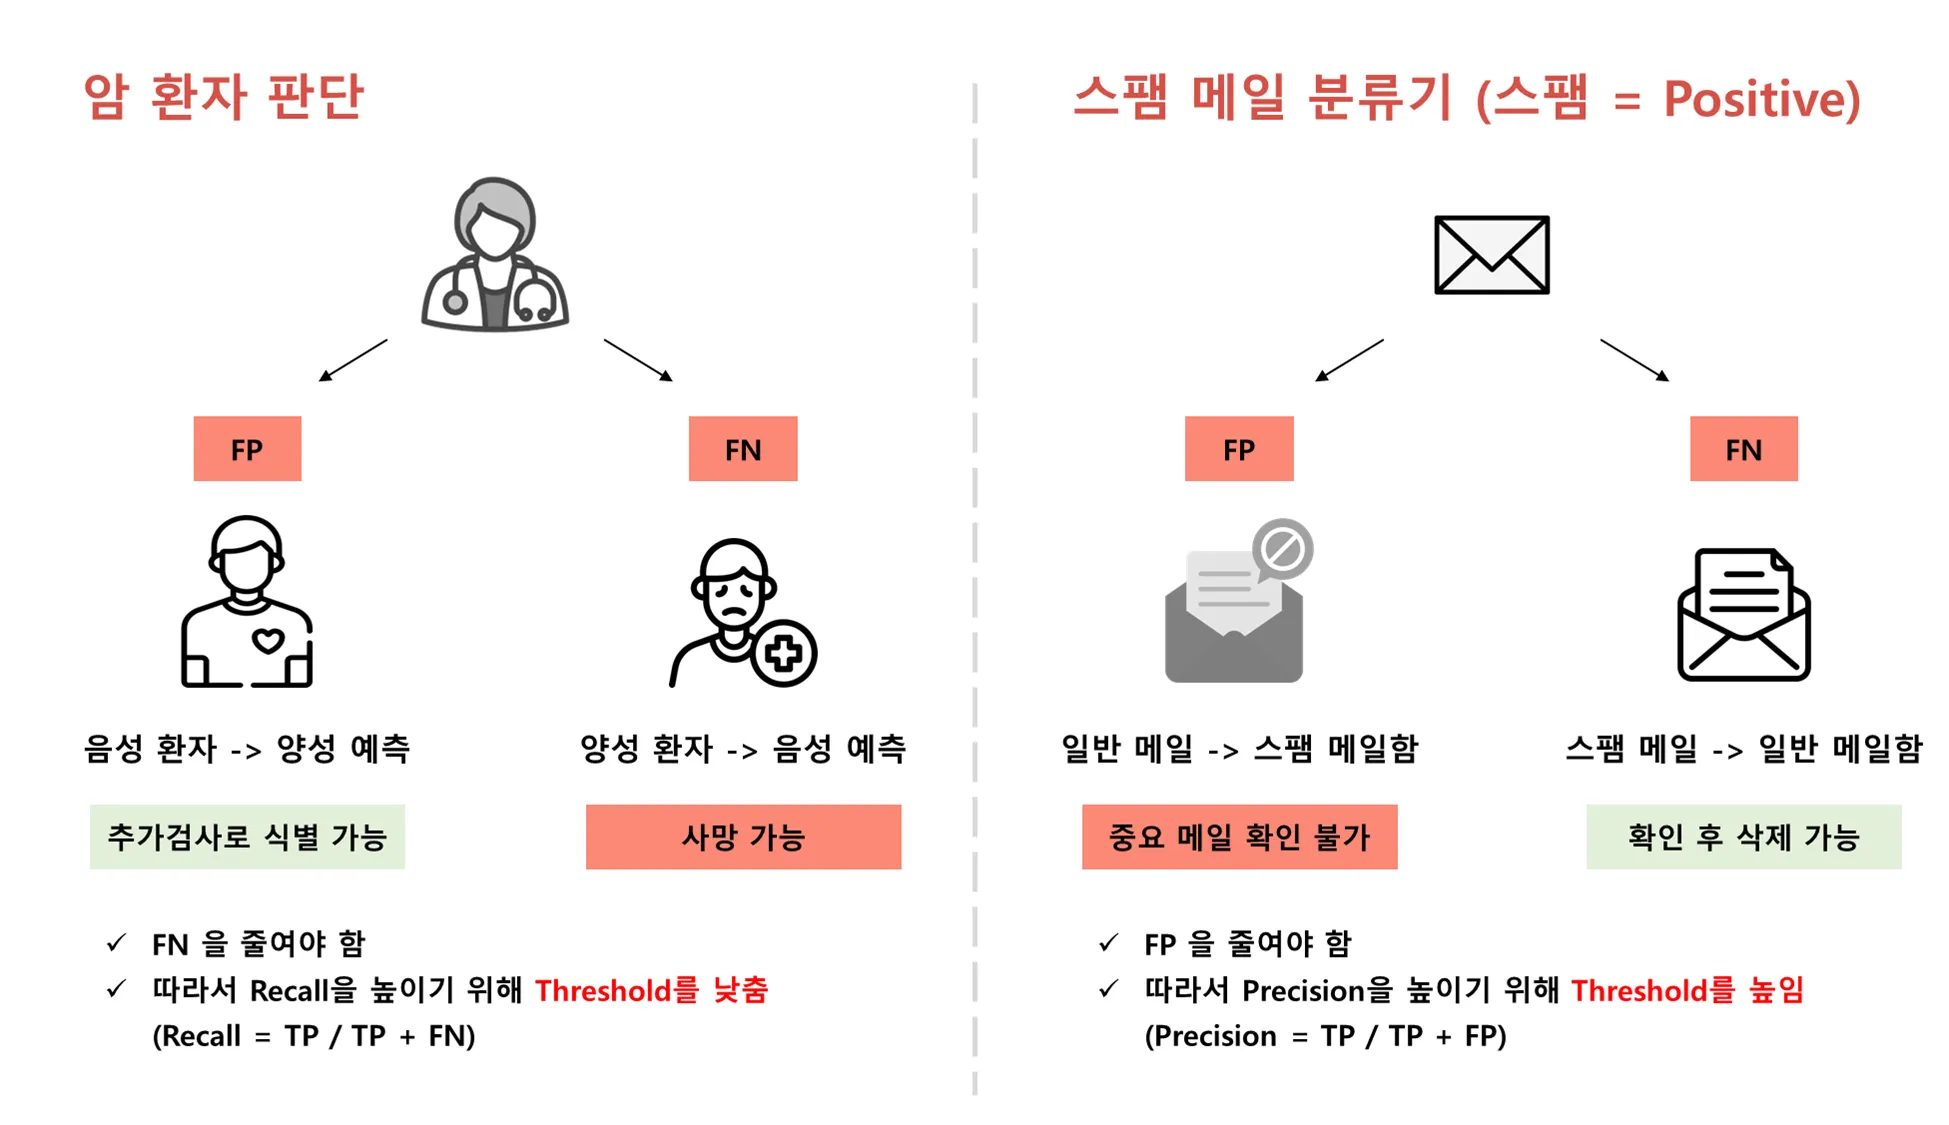
* Threshold는 모델의 참 거짓을 가르는 분류기준임.(넘으면 참)
* Threshold를 낮추면 참으로 예측하는 경우가 많아짐->Recall ⬆️, Precision ⬇️
* Threshold를 높이면 거짓으로 예측하는 경우가 많아짐->Precision ⬆️, Recall ⬇️

### [정밀도(precision) & 재현도(recall) 그래프]
- 정밀도 & 재현도 그래프에서 두 value값이 만나는 지점을 Threshold로 정하면, 예측 오류를 최소화할 수 있음  
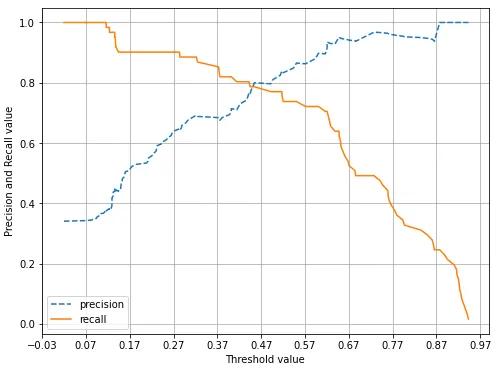


## (2) F1-Score
- F1-Score: 정밀도(precision)와 재현율(recall)의 조화 평균  
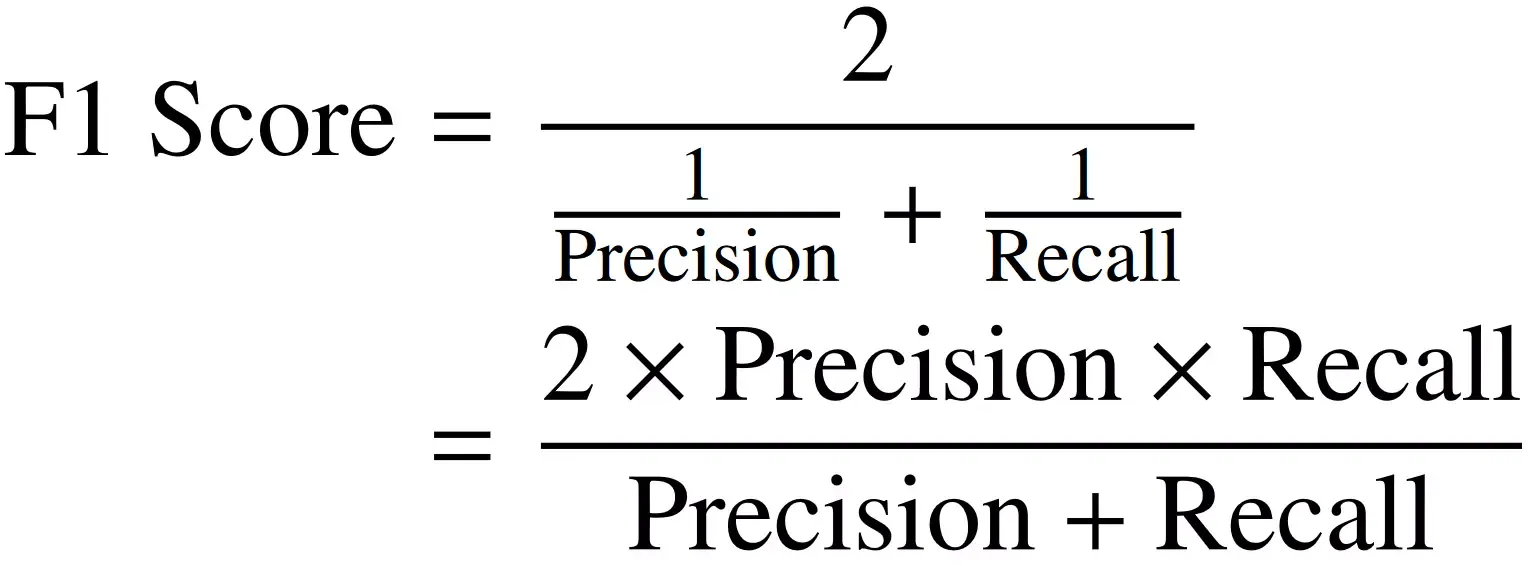
- F1 Score는 머신러닝 모델의 성능을 평가하는 주요지표임. 조화평균을 사용하는 이유는 Precision(정밀도)와 Recall(재현율) 간의 균형을 효과적으로 평가하기 위함

## (3) ROC/AUC Curve

### [ROC Curve]
- 얼마나 분류가 잘 되었는가를 보여주는 그래프  
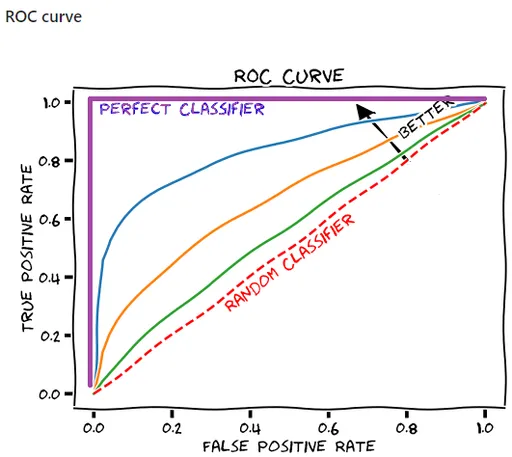
- True Positive Rate(TPR): 참인 것들 중에 참이라고 예측한 비율
- False Positive Rate(FPR): 거짓인 것들 중에 참이라고 잘못 예측한 비율
- 완벽한 분류기는 나올 수 없음. 시간과 비용을 고려해 적절히 타협한 최선의 ROC Curve를 도축해야 함.

### [AUC Curve]
- ROC와 x축 사이의 면적(적분값)  
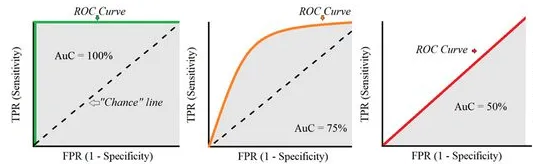
- 모델의 성능을 숫자로 나타낼 수 있음
- 0.5~1 사이의 값을 가짐. 1에 가까울수록 분류 성능이 좋은 것에 해당함

## (4) 다중 분류 평가 지표
- 2개보다 많은 분류기준이 있을 때 평가 지표

### [Macro average]
- 각 클래스별로 구한 평가 지표(ex. F1 Score)를 단순 평균하여 전체적인 모델 성능을 평가
- 모든 라벨이 유사한 중요도를 가질 때 사용

### [Weighted average]
- 각 클래스별로 구한 평가 지표를 클래스의 샘플 수로 가중 평균하여 전체적인 모델의 성능을 평가, 빈도가 높은 클래스에 더 큰 가중치를 부여함
- 샘플이 많은 라벨에 높은 중요도를 두고 싶을 때 사용

### [Micro average]
- 모든 클래스의 예측 결과를 더하여 전체적인 성능을 평가하는 지표
- 모든 클래스에 대해 동등한 가중치를 부여함
- 라벨에 상관없이 전체적인 성능을 평가하고 싶을 때 사용


# 4. 하이퍼파라미터 최적화
## (1) 하이퍼파라미터 최적화
### [하이퍼 파라미터]
- 하이퍼파라미터: 학습 시작 전에 **사용자가 직접 설정하는 변수**
    - ex) decision tree의 `max_depth`,  random forest의 `n_estimators`  
- 하이퍼파라미터 최적화: Tuning을 거쳐 **적절한 하이퍼파라미터를 찾아** 모델 성능을 향상시키는 것

💡 [ 하이퍼파라미터 최적화 과정 ]

1. Hyperparameter 탐색 범위 설정 (최적 값을 찾고 싶은 하이퍼파라미터의 범위를 설정)
2. 평가 지표 계산 함수(성능 평가 함수) 정의(탐색하려는 Hyperparameter를 인수로 받아 평가지표 값을 계산해주는 함수를 정의)
3. 1단계에서 샘플링한 Hyperparameter 값을 사용하여 검증 데이터로 정확도 평가
4. 위 단계를 특정 횟수 반복하며, 정확도 결과를 보고 하이퍼파라미터의 범위 좁힘

## (2) 하이퍼파라미터 최적화 방법

1️⃣ **Grid Search**
- 정해진 범위에서 Hyperparameter를 **모두** 순회하며 가장 좋은 성능을 내는 값을 찾는 기법  
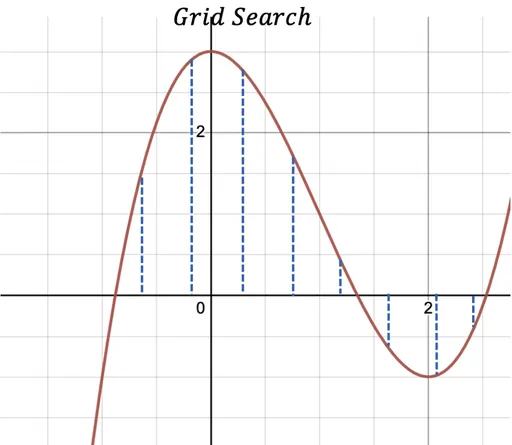
- 장점: 범위가 넓고 step이 작을수록 꼼꼼하게 전 범위를 탐색하니 최적해를 정확히 찾을 수 있음
- 단점: 시간이 너무 오래 걸림
- 적용: 넓은 범위, 큰 step을 활용해 범위를 좁힘

2️⃣ **Random Search**
- 정해진 범위에서 Hyperparameter를 **무작위**로 탐색해 가장 좋은 성능을 내는 값을 찾는 기법  
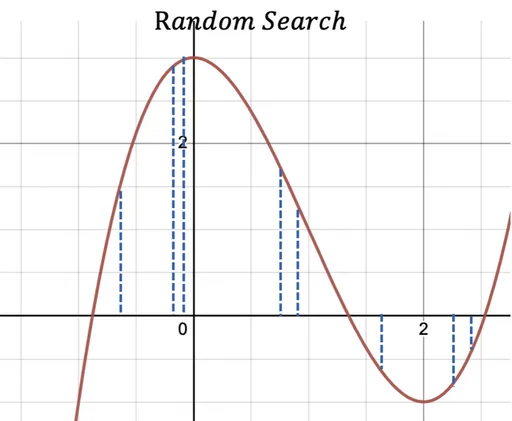
- 장점: 속도가 Grid Search보다 빠름
- 단점: 무작위라는 한계 때문에 정확도가 떨어짐. 따라서 다른 방법에 비해 사용 빈도가 적음.

3️⃣ **Bayesian Optimization**
- 사전 정보를 바탕으로 최적 Hyperparameter 값을 확률적으로 추정하며 탐색하는 기법  
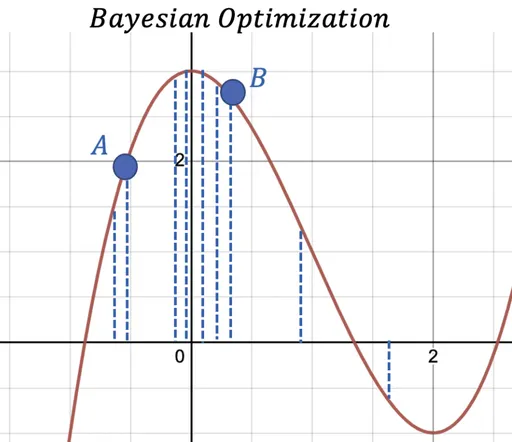
- 특징 : "Gausain Process"라는 통계학을 기반으로 만들어진 모델로, 여러 개의 하이퍼 파라미터들에 대해서, "Aquisition Fucntion"을 적용했을 때, "가장 큰 값"이 나올 확률이 높은 지점을 찾아냄
- 방법
    - 초기 값 몇 개를 무작위로 실험해봄
    - 그 결과를 바탕으로 어떤 파라미터의 조합이 좋을 지를 확률 모델로 예측함
    - 다음 실험할 조합을 가장 좋을 것 같은 위치로 선택함
    - 결과를 반영하고 다시 반복함